In [1]:
import torch
from torch.utils.data import Dataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools 
import random
import numpy as np
import matplotlib.lines as mlines
import pickle
import io
#from fun_choices import*


In [5]:
import torch
from torch.utils.data import Dataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools 
import random
import numpy as np
import matplotlib.lines as mlines
import pickle
import io
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)
def load_file(f):
    with open(f, "rb") as rb:
        pickle.load(rb)
        #return pickle.load(rb)
        return CPU_Unpickler(rb).load()
        

def choice_lr(net,s,s0,L):
    if net =='lcn' or net=='lcn_shared':
        if s>2:
            lr = .003
        else:
            if s0<4:
                lr = 0.01
            else:
                lr = 0.003
    elif net=="cnn2" or net=='cnn2_shared':
        if s>2:
            if s0<4:
                lr = 0.01
            elif s0==4:
                lr = 0.003
            elif s0==6:
                lr = 0.0003

        else:
            if s0>0:
                if L>=3:
                    if s0<4:
                        lr = 0.01
                    elif s0==4:
                        lr = 0.003
                    else:
                        lr = 0.001
                elif L==2:
                    if s0<4:
                        lr = 0.1
                    elif s0==4:
                        lr = 0.03
                    else:
                        lr = 0.01
            else:
                lr = 0.01
            if L==1:
                if s0<4:
                    lr = 0.1
                else:
                    lr = .03
    return lr

def training_point(net,s,s0,L,n,m):
    if net=='lcn' or net=='lcn_shared':
        if s==2:
            p_pred = n**(L)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


            if s0 <4:
                xx= np.logspace(np.log10(int(p_pred)),np.log10(200*p_pred),15)
                xx =xx[:-1]
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(500*p_pred),15)
                xx =xx[:-1]
                #xx1 = np.array([107999,135917])
                #xx = np.concatenate((xx,xx1))
        if s>2:
            p_pred = ((s0+1)**L)*m**(L)
            
            xx= np.logspace(np.log10(int(0.1*p_pred)),np.log10(10*p_pred),10)
            xx1 = np.logspace(np.log10(10*p_pred),np.log10(100*p_pred),10)
            xx = np.concatenate((xx,xx1))
    else:
        if s>2: 
            p_pred = n**(L)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)


            if s0 <=4:
                xx= np.logspace(np.log10(int(p_pred)),np.log10(100*p_pred),15)
                xx =xx[:-1]
            else:
                xx= np.logspace(np.log10(p_pred),np.log10(500*p_pred),15)
                xx =xx[:-1]
                #xx1 = np.array([107999,135917])
                #xx = np.concatenate((xx,xx1))

            if s==3 or s==4:
                if L==2:
                    xx1= np.logspace(np.log10(100*p_pred),np.log10(500*p_pred),15)
                    xx = np.concatenate((xx,xx1))
                    xx1= np.logspace(np.log10(500*p_pred),np.log10(1000*p_pred),15)
                    xx = np.concatenate((xx,xx1))
                if s==4:
                    xx1= np.logspace(np.log10(1000*p_pred),np.log10(2000*p_pred),10)                            
                    xx = np.concatenate((xx,xx1))
                    xx1= np.logspace(np.log10(2000*p_pred),np.log10(10000*p_pred),10)                            
                    xx = np.concatenate((xx,xx1))
                    xx1= np.logspace(np.log10(10000*p_pred),np.log10(50000*p_pred),10)                            
                    xx = np.concatenate((xx,xx1))
                if s==3 and s0==4:
                    xx1= np.logspace(np.log10(int(1000*p_pred)),np.log10(10000*p_pred),10)
                    xx = np.concatenate((xx,xx1))
        else:
            p_pred = n**(L+1)
            #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
            if L>1:
                if s0>0:
                    if L>=3:
                        pmax = 110000

                        if s0 <4:
                            xx= np.logspace(np.log10(p_pred),np.log10(100*p_pred),15)

                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(300*p_pred),15)
                        if s0==1:
                            if n==8 or n==10:
                                xx0 = np.logspace(np.log10(int(0.1*p_pred)),np.log10(p_pred),5)
                                xx0 = xx0[:-1]
                                xx = np.concatenate((xx0,xx))
                    elif L==2:
                        pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
                        p_pred = n**(L+1)
                        p_max_used = min(pmax,110000)
                        #p_pred = n**(L+1)
                        if s0>=4:
                            xx= np.logspace(np.log10(p_pred),np.log10(p_max_used),15)
                        else:
                            xx= np.logspace(np.log10(p_pred),np.log10(pmax),15)
                        
                        xx0 = np.logspace(np.log10(int(0.1*p_pred)),np.log10(p_pred),5)
                        xx0 = xx0[:-1]
                        xx = np.concatenate((xx0,xx))
                else:
                    p_pred_red = n**L
                    xx= np.logspace(np.log10(int(0.2*p_pred_red)),np.log10(100*p_pred_red),15)
            else:
                p_pred_1 = n**L
                if s0 <4:
                    xx= np.logspace(np.log10(p_pred_1),np.log10(200*p_pred_1),15)

                else:
                    xx= np.logspace(np.log10(p_pred_1),np.log10(500*p_pred_1),15)
            if s==3:
                p_pred = (s0+1)*m**(L)
                #p_max_used = min(pmax,110000)
                #p_pred = n**(L+1)
                if s0 <= 4:
                    #xx1= np.logspace(np.log10(int(1000*p_pred)),np.log10(2000*p_pred),10)
                    #xx = np.concatenate((xx,xx1))
                    xx= np.logspace(np.log10(int(0.1*p_pred)),np.log10(10*p_pred),15)
            xx =xx[:-1]
    return xx

def load_net(net,ptr,n,m,L,q,s0,s,seed,width,lr):
    if net=='lcn_shared':
        #print("lcn_shared/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_q_"+str(q)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        tmp = load_file("lcn_shared/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_q_"+str(q)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    if net=='cnn2_shared':
         
        tmp = load_file("cnn_shared/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        print("cnn_shared/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

        
    if net=='lcn':
        if s>2:
            #net+"_data_L"+str(2)+"_A_0s
            tmp = load_file("lcn_s_L2/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
            #if L>3:
            #    tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        else:
            if L==1:
                #print(ptr)
                tmp = load_file("lcn_L1/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(2)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

            else:
                #if L<=3:
                tmp = load_file(net+"_data_L"+str(2)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    elif net=='cnn2':                       
        if s>2:
            if ptr>= 176055 and s==4:
                lr_tmp = 0.005
                tmp = load_file("cnn_s_max/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr_tmp)+".npy")
            else:
                tmp = load_file("cnn_s_max/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        else:
            if L==1:
            #print(ptr)
                tmp = load_file("cnn_L1/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

            else:
                if s0==0:
                    tmp = load_file("check_s0/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")

                else:
                    if L<=3:
                        tmp = load_file(net+"_data_L"+str(L)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                    if L>3:
                        tmp = load_file(net+"_data_L"+str(3)+"_A_0s/hier1_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    
    return tmp


def training_point_new(xx,net,n,m,L,q,s0,s,width,lr):
    xx_new = []
                
    for ptrx in xx:

        #print(ptrx,pmax)
        ptr = int(ptrx) 


        tmp_seed = 0

        num_seeds = 0
        for (idx_seed,seed) in enumerate(np.array([1])):

            try:

                tmp = load_net(net,ptr,n,m,L,q,s0,s,seed,width,lr)
                tmp_seed += (100-tmp[choice]["acc"])/100
                num_seeds +=1
                xx_new.append(ptr)
            except:
                #if s>2:
                #    print("cnn_s_max/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
                #print('s0 not happened: '+str(s0)+'and P: '+str(ptr))
                pass
    xx_new = torch.tensor(xx_new)
    return xx_new

1
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_409_n_8_m_8_L_3_s0_1_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_727_n_8_m_8_L_3_s0_1_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_1294_n_8_m_8_L_3_s0_1_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_2302_n_8_m_8_L_3_s0_1_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_4095_n_8_m_8_L_3_s0_1_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_5691_n_8_m_8_L_3_s0_1_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_7908_n_8_m_8_L_3_s0_1_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_10988_n_8_m_8_L_3_s0_1_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_15268_n_8_m_8_L_3_s0_1_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_21215_n_8_m_8_L_3_s0_1_s_2_seed_1_width_512_lr_0.01.npy
cnn_sha

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_100000_n_10_m_10_L_3_s0_2_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_138949_n_10_m_10_L_3_s0_2_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_193069_n_10_m_10_L_3_s0_2_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_268269_n_10_m_10_L_3_s0_2_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_372759_n_10_m_10_L_3_s0_2_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_517947_n_10_m_10_L_3_s0_2_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_719685_n_10_m_10_L_3_s0_2_s_2_seed_1_width_512_lr_0.01.npy
4
[0.5 0.  1.  1. ]
1
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_409_n_8_m_8_L_3_s0_1_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_727_n_8_m_8_L_3_s0_1_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_1294_n_8_m_8_L_3_

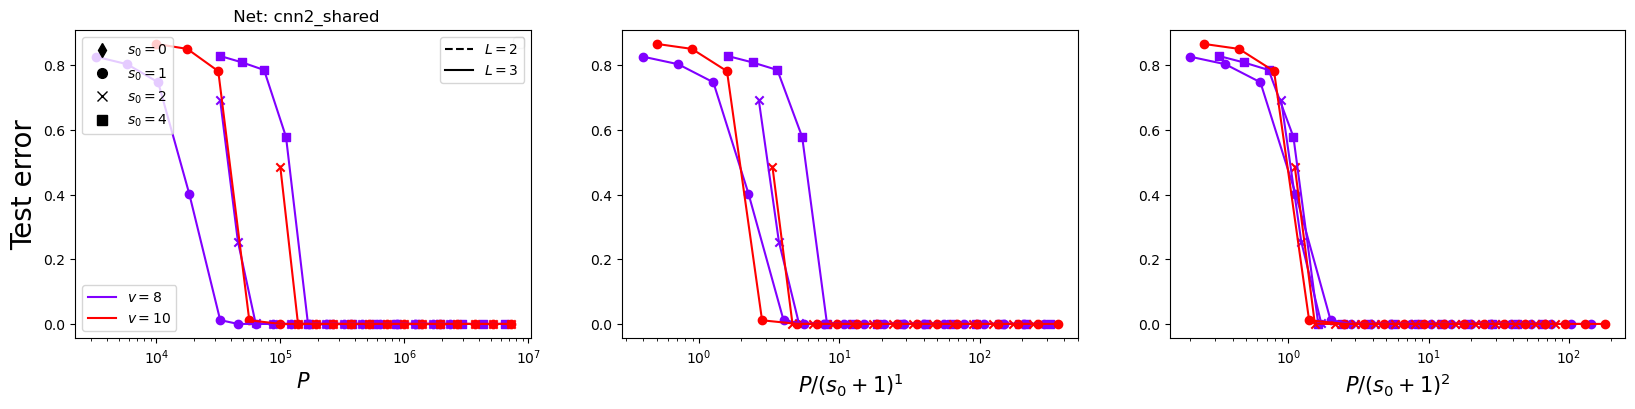

In [7]:
ns  = [8,10]
colors = cm.rainbow(np.linspace(0, 1, len(ns)))
sss= [2]


###### L=3 ########
#NO WHITENING
choice = "best"

#lr = .1
width = 512
seed = 0
nets =["cnn2_shared"]#i

fig, axs = plt.subplots(1,3, figsize = (20,4))
s0s = [1,2,4] #,2,4,6
Ls=[3]

for (idxL,L) in enumerate(Ls):
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==1: lss = ':'
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxq,q) in enumerate([1]):
            
            
            
          
            for (idx_s0,s0) in enumerate(s0s):
                print(s0)
        
                
                
                for (idxs,s) in enumerate(sss):
        
                    if s==4 and s0>0:
                        break
                    
                    
                    m = n**(s-1)
                    for (idxnet,net) in enumerate(nets):
                        axs[0].set_title(" Net: "+net)
                        #print(n)
                        lr = choice_lr(net,s,s0,L)
        
                        accs_cnn = []
                        
                        xx = training_point(net,s,s0,L,n,m)
                        xx = training_point_new(xx,net,n,m,L,q,s0,s,width,lr)
                        
                        for ptrx in xx:
        
                            #print(ptrx,pmax)
                            ptr = int(ptrx) 
                            
                            
                            tmp_seed = 0
        
                            num_seeds = 0
                            for (idx_seed,seed) in enumerate(np.array([1])):
        
        
                            #print(ptr)
                                try:
                                    tmp = load_net(net,ptr,n,m,L,q,s0,s,seed,width,lr)
                                    #print(tmp[choice]["acc"])
                                    tmp_seed += (100-tmp[choice]["acc"])/100
                                    num_seeds +=1
                                except:
                                    print('wtf')        
                                    #pass
                            if num_seeds>0:
                                accs_cnn.append(tmp_seed/num_seeds)
                        
                        #if L==2 and s0>0:
                        #    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls=lss,color = col)  
                        #else:
                        if L==2 and s0==4:
                            indices_to_remove = np.where(xx==74957)
                            accs_cnn = np.delete(accs_cnn, indices_to_remove)
                            xx = xx[xx!=74957]
                            
                        axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                        
                        if s0==1:
                            mar = "o"
                        elif s0==2:
                            mar = "x"
                        elif s0==4:
                            mar = "s"
                        elif s0==6:
                            mar = "v"
                        elif s0==0:
                            mar = "d"
                        
                        axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col)  
        
                        #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                        #plt.axvline(x=n**4,color="red")
                        #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                        axs[0].set_xlabel(r"$P$",size = 15)
                        axs[0].set_ylabel("Test error", size = 20)
                        axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03],loc = 'upper left')   
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L

s01 = mlines.Line2D([], [], color='black', marker=None, linestyle='--',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s03 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=1$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s01,s02],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n


nlist = []
for (idxn,n) in enumerate(ns):
    nlist.append(mlines.Line2D([], [], color=colors[idxn], marker=None, linestyle='-',
              markersize=7, label=r'$v=%d$'%(n)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
axs[0].legend(handles=nlist,loc = 'lower left')  

  
###############################################################



###### L=3 ########
#NO WHITENING

nets =["cnn2_shared","cnn2_shared"]#


for (idxL,L) in enumerate(Ls):
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==1: lss = ':'
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        print(col)
        for (idxq,q) in enumerate([1]):
            
            for (idx_s0,s0) in enumerate(s0s):
                print(s0)
        
                
                for (idxs,s) in enumerate(sss):
    
                    m = n**(s-1)
                    for (idxnet,net) in enumerate(nets):
                        axs[0].set_title(" Net: "+net)
                        #print(n)
                        lr = choice_lr(net,s,s0,L)
        
                        accs_cnn = []
                        
                        #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
        
        
                        xx = training_point(net,s,s0,L,n,m)
                        xx = training_point_new(xx,net,n,m,L,q,s0,s,width,lr)
    
                        for ptrx in xx:
        
                            #print(ptrx,pmax)
                            ptr = int(ptrx) 
                            
                            
                            tmp_seed = 0
        
                            num_seeds = 0
                            for (idx_seed,seed) in enumerate(np.array([1])):
        
        
                            #print(ptr)
                                try:
                                    tmp = load_net(net,ptr,n,m,L,q,s0,s,seed,width,lr)
                                    tmp_seed += (100-tmp[choice]["acc"])/100
                                    num_seeds +=1
                                except:
                                    #print("lcn_s_L2/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        
                                    pass
                            if num_seeds>0:
                                accs_cnn.append(tmp_seed/num_seeds)
                        if L==2 and s0==4:
                            indices_to_remove = np.where(xx==74957)
                            accs_cnn = np.delete(accs_cnn, indices_to_remove)
                            xx = xx[xx!=74957]
                        if idxnet==2:
        
                            fac_m = n*m**(L)
                            xx = xx/(fac_m)
                            if L==2:
                                xx = xx/(s0+1)
                            elif L==3:
                                xx = xx/(s0+1)**2
                            axs[idxnet+1].set_xlabel(r"$P/(s_0+1)^k$",size = 15)
                        elif idxnet==0:
                            fac_m = n*m**(L)
                            xx = xx/(fac_m*(s0+1)**(1))
        
                            axs[idxnet+1].set_xlabel(r"$P/(s_0+1)^1$",size = 15)
                        elif idxnet==1:
                            fac_m = n*m**(L)
                            
                            xx = xx/(fac_m*(s0+1)**(2))
        
                            axs[idxnet+1].set_xlabel(r"$P/(s_0+1)^{2}$",size = 15)
                        
                            
                        axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                        
                        if s0==1:
                            mar = "o"
                        elif s0==2:
                            mar = "x"
                        elif s0==4:
                            mar = "s"
                        elif s0==6:
                            mar = "v"
                        elif s0==0:
                            mar = "d"
                        #if L==2 and s0>0:
                        #    axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 
                        #else:
                        axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                        
                        #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                        #plt.axvline(x=n**4,color="red")
                        #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                        
                        axs[idxnet+1].set_xscale("log")
                    
        
plt.savefig("cnn_sharing.pdf", bbox_inches='tight')
plt.savefig("cnn_sharing.png", bbox_inches='tight')

In [ ]:
ns  = [8,10]
colors = cm.rainbow(np.linspace(0, 1, len(ns)))
sss= [2]


###### L=3 ########
#NO WHITENING
choice = "best"

#lr = .1
width = 512
seed = 0
nets =["cnn2_shared"]#i

fig, axs = plt.subplots(1,4, figsize = (20,4))
s0s = [1,2,4] #,2,4,6
Ls=[2,3]

for (idxL,L) in enumerate(Ls):
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==1: lss = ':'
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxq,q) in enumerate([1]):
            
            
            
          
            for (idx_s0,s0) in enumerate(s0s):
                print(s0)
        
                
                
                for (idxs,s) in enumerate(sss):
        
                    if s==4 and s0>0:
                        break
                    
                    
                    m = n**(s-1)
                    for (idxnet,net) in enumerate(nets):
                        axs[0].set_title(" Net: "+net)
                        #print(n)
                        lr = choice_lr(net,s,s0,L)
        
                        accs_cnn = []
                        
                        xx = training_point(net,s,s0,L,n,m)
                        xx = training_point_new(xx,net,n,m,L,q,s0,s,width,lr)
                        
                        for ptrx in xx:
        
                            #print(ptrx,pmax)
                            ptr = int(ptrx) 
                            
                            
                            tmp_seed = 0
        
                            num_seeds = 0
                            for (idx_seed,seed) in enumerate(np.array([1])):
        
        
                            #print(ptr)
                                try:
                                    tmp = load_net(net,ptr,n,m,L,q,s0,s,seed,width,lr)
                                    #print(tmp[choice]["acc"])
                                    tmp_seed += (100-tmp[choice]["acc"])/100
                                    num_seeds +=1
                                except:
                                    print('wtf')        
                                    #pass
                            if num_seeds>0:
                                accs_cnn.append(tmp_seed/num_seeds)
                        
                        #if L==2 and s0>0:
                        #    axs[0].plot(xx[:len(accs_cnn)],accs_cnn,ls=lss,color = col)  
                        #else:
                        if L==2 and s0==4:
                            indices_to_remove = np.where(xx==74957)
                            accs_cnn = np.delete(accs_cnn, indices_to_remove)
                            xx = xx[xx!=74957]
                            
                        axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                        
                        if s0==1:
                            mar = "o"
                        elif s0==2:
                            mar = "x"
                        elif s0==4:
                            mar = "s"
                        elif s0==6:
                            mar = "v"
                        elif s0==0:
                            mar = "d"
                        
                        axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col)  
        
                        #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                        #plt.axvline(x=n**4,color="red")
                        #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                        axs[0].set_xlabel(r"$P$",size = 15)
                        axs[0].set_ylabel("Test error", size = 20)
                        axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03],loc = 'upper left')   
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L

s01 = mlines.Line2D([], [], color='black', marker=None, linestyle='--',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s03 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=1$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s01,s02],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n


nlist = []
for (idxn,n) in enumerate(ns):
    nlist.append(mlines.Line2D([], [], color=colors[idxn], marker=None, linestyle='-',
              markersize=7, label=r'$v=%d$'%(n)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
axs[0].legend(handles=nlist,loc = 'lower left')  

  
###############################################################



###### L=3 ########
#NO WHITENING

nets =["cnn2_shared","cnn2_shared","cnn2_shared"]#


for (idxL,L) in enumerate(Ls):
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==1: lss = ':'
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        print(col)
        for (idxq,q) in enumerate([1]):
            
            for (idx_s0,s0) in enumerate(s0s):
                print(s0)
        
                
                for (idxs,s) in enumerate(sss):
    
                    m = n**(s-1)
                    for (idxnet,net) in enumerate(nets):
                        axs[0].set_title(" Net: "+net)
                        #print(n)
                        lr = choice_lr(net,s,s0,L)
        
                        accs_cnn = []
                        
                        #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
        
        
                        xx = training_point(net,s,s0,L,n,m)
                        xx = training_point_new(xx,net,n,m,L,q,s0,s,width,lr)
    
                        for ptrx in xx:
        
                            #print(ptrx,pmax)
                            ptr = int(ptrx) 
                            
                            
                            tmp_seed = 0
        
                            num_seeds = 0
                            for (idx_seed,seed) in enumerate(np.array([1])):
        
        
                            #print(ptr)
                                try:
                                    tmp = load_net(net,ptr,n,m,L,q,s0,s,seed,width,lr)
                                    tmp_seed += (100-tmp[choice]["acc"])/100
                                    num_seeds +=1
                                except:
                                    #print("lcn_s_L2/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        
                                    pass
                            if num_seeds>0:
                                accs_cnn.append(tmp_seed/num_seeds)
                        if L==2 and s0==4:
                            indices_to_remove = np.where(xx==74957)
                            accs_cnn = np.delete(accs_cnn, indices_to_remove)
                            xx = xx[xx!=74957]
                        if idxnet==2:
        
                            fac_m = n*m**(L)
                            xx = xx/(fac_m)
                            if L==2:
                                xx = xx/(s0+1)
                            elif L==3:
                                xx = xx/(s0+1)**2
                            axs[idxnet+1].set_xlabel(r"$P/(s_0+1)^k$",size = 15)
                        elif idxnet==0:
                            fac_m = n*m**(L)
                            xx = xx/(fac_m*(s0+1)**(1))
        
                            axs[idxnet+1].set_xlabel(r"$P/(s_0+1)^1$",size = 15)
                        elif idxnet==1:
                            fac_m = n*m**(L)
                            
                            xx = xx/(fac_m*(s0+1)**(2))
        
                            axs[idxnet+1].set_xlabel(r"$P/(s_0+1)^{2}$",size = 15)
                        
                            
                        axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                        
                        if s0==1:
                            mar = "o"
                        elif s0==2:
                            mar = "x"
                        elif s0==4:
                            mar = "s"
                        elif s0==6:
                            mar = "v"
                        elif s0==0:
                            mar = "d"
                        #if L==2 and s0>0:
                        #    axs[idxnet+1].scatter(xx[:len(accs_cnn)],accs_cnn,marker = mar,color = col) 
                        #else:
                        axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
                        
                        #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                        #plt.axvline(x=n**4,color="red")
                        #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                        
                        axs[idxnet+1].set_xscale("log")
                    
        
plt.savefig("cnn_sharing.pdf", bbox_inches='tight')
plt.savefig("cnn_sharing.png", bbox_inches='tight')

1
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_50_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_lr_0.1.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_161_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_lr_0.1.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_287_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_lr_0.1.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_512_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_lr_0.1.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_799_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_lr_0.1.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_1248_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_lr_0.1.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_1949_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_lr_0.1.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_3043_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_lr_0.1.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_4751_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_lr_0.1.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_7419_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_lr_0.1.npy
cnn_shared/hier1_w_0_cnn

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_372759_n_10_m_10_L_3_s0_2_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_517947_n_10_m_10_L_3_s0_2_s_2_seed_1_width_512_lr_0.01.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_719685_n_10_m_10_L_3_s0_2_s_2_seed_1_width_512_lr_0.01.npy
4
[0.5 0.  1.  1. ]
1
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_50_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_lr_0.1.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_161_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_lr_0.1.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_287_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_lr_0.1.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_512_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_lr_0.1.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_799_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_lr_0.1.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_1248_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_lr_0.1.npy
cnn_shared/hier1_w_0_cnn2_shared_diffeo_ptr_1949_n_8_m_8_L_2_s0_1_s_2_seed_1_width_512_

TEST IF LIKE CNN WITH s0=0 FOR q=2 
2
2
2
2
2
2


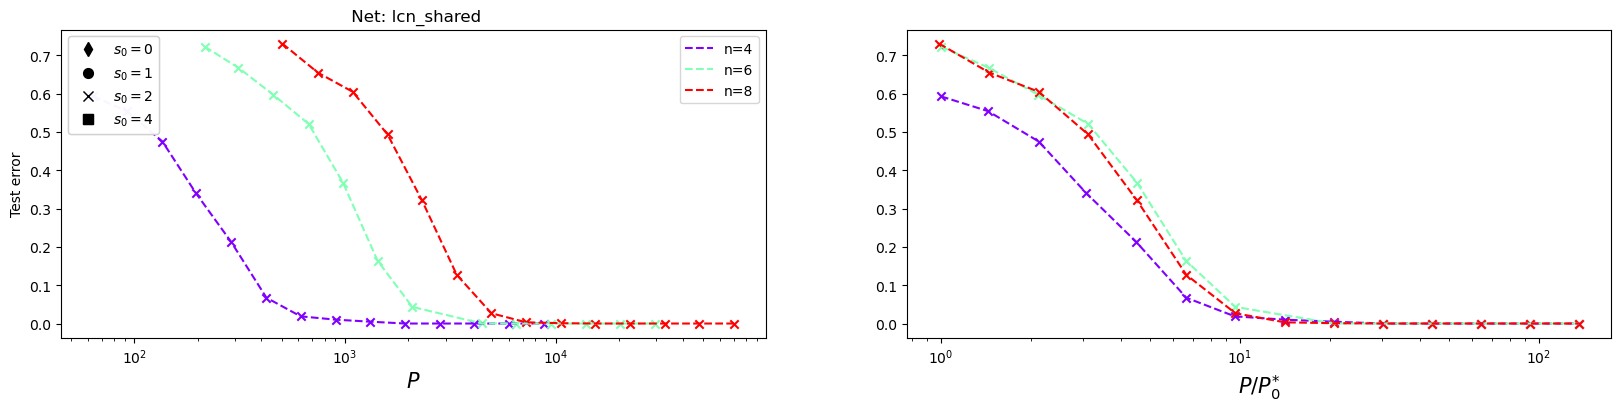

In [24]:
ns  = [4,6,8]
sss= [2]

print("TEST IF LIKE CNN WITH s0=0 FOR q=2 ")
###### L=3 ########
#NO WHITENING
choice = "best"

#lr = .1
width = 512
seed = 0
nets =["lcn_shared"]#i

fig, axs = plt.subplots(1,2, figsize = (20,4))
s0s = [2] #,2,4,6
Ls=[2]

for (idxL,L) in enumerate(Ls):
    colors = cm.rainbow(np.linspace(0, 1, L+1))
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==1: lss = ':'
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxq,q) in enumerate([2]):
            
            
            
            
        
            for (idx_s0,s0) in enumerate(s0s):
                print(s0)
        
                
                
                for (idxs,s) in enumerate(sss):
        
                    if s==4 and s0>0:
                        break
                    
                    
                    m = n**(s-1)
                    for (idxnet,net) in enumerate(nets):
                        axs[0].set_title(" Net: "+net)
                        #print(n)
                        lr = choice_lr(net,s,s0,L)
        
                        accs_cnn = []
                        
                        xx = training_point(net,s,s0,L,n,m)
                        xx = training_point_new(xx,net,n,m,L,q,s0,s,width,lr)
                        
                        for ptrx in xx:
        
                            #print(ptrx,pmax)
                            ptr = int(ptrx) 
                            
                            
                            tmp_seed = 0
        
                            num_seeds = 0
                            for (idx_seed,seed) in enumerate(np.array([1])):
        
        
                            #print(ptr)
                                try:
                                    tmp = load_net(net,ptr,n,m,L,q,s0,s,seed,width,lr)
                                    tmp_seed += (100-tmp[choice]["acc"])/100
                                    num_seeds +=1
                                except:
                                    #print("lcn_s_L2/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        
                                    pass
                            if num_seeds>0:
                                accs_cnn.append(tmp_seed/num_seeds)
                        
                        axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col,label ="n=%d"%n)  
                        
                        if s0==1:
                            mar = "o"
                        elif s0==2:
                            mar = "x"
                        elif s0==4:
                            mar = "s"
                        elif s0==6:
                            mar = "v"
                        elif s0==0:
                            mar = "d"
                        axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
        
                        #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                        #plt.axvline(x=n**4,color="red")
                        #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                        axs[0].set_xlabel(r"$P$",size = 15)
                        axs[0].set_ylabel("Test error")
                        axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03],loc = 'upper left')   
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L
'''
s01 = mlines.Line2D([], [], color='black', marker=None, linestyle='--',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s03 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=1$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s03,s01,s02],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n
'''
'''
list = []
for (idxs,s) in enumerate(sss):
    nlist.append(mlines.Line2D([], [], color=colors[idxs], marker=None, linestyle='-',
              markersize=7, label=r'$s=%d$'%(s)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
axs[0].legend(handles=nlist,loc = 'lower left')  
'''
  
###############################################################



###### L=3 ########
#NO WHITENING

nets =["lcn_shared"]#


for (idxL,L) in enumerate(Ls):
    colors = cm.rainbow(np.linspace(0, 1, L+1))
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==1: lss = ':'
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxq,q) in enumerate([2]):
            
            for (idx_s0,s0) in enumerate(s0s):
                print(s0)
        
                
                for (idxs,s) in enumerate(sss):
    
                    m = n**(s-1)
                    for (idxnet,net) in enumerate(nets):
                        axs[0].set_title(" Net: "+net)
                        #print(n)
                        lr = choice_lr(net,s,s0,L)
        
                        accs_cnn = []
                        
                        #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
        
        
                        xx = training_point(net,s,s0,L,n,m)
                        xx = training_point_new(xx,net,n,m,L,q,s0,s,width,lr)
    
                        for ptrx in xx:
        
                            #print(ptrx,pmax)
                            ptr = int(ptrx) 
                            
                            
                            tmp_seed = 0
        
                            num_seeds = 0
                            for (idx_seed,seed) in enumerate(np.array([1])):
        
        
                            #print(ptr)
                                try:
                                    tmp = load_net(net,ptr,n,m,L,q,s0,s,seed,width,lr)
                                    tmp_seed += (100-tmp[choice]["acc"])/100
                                    num_seeds +=1
                                except:
                                    #print("lcn_s_L2/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        
                                    pass
                            if num_seeds>0:
                                accs_cnn.append(tmp_seed/num_seeds)
                         
                        if idxnet==0:
        
                            fac_m = n*m**(L)
                            xx = xx/(fac_m)
        
                            axs[idxnet+1].set_xlabel(r"$P/P^{*}_{0}$",size = 15)
                        elif idxnet==1:
                            fac_m = n*m**(L)
                            xx = xx/(fac_m*(s0+1)**(L))
        
                            axs[idxnet+1].set_xlabel(r"$P/(s_0+1)^L$",size = 15)
                        elif idxnet==2:
                            fac_m = n*m**(L)
                            
                            xx = xx/(fac_m*(s0+1)**(L-1+s))
        
                            axs[idxnet+1].set_xlabel(r"$P/[(s_0+1)^{L-1}(s_0+1)^s]$",size = 15)
        
                        axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                        
                        if s0==1:
                            mar = "o"
                        elif s0==2:
                            mar = "x"
                        elif s0==4:
                            mar = "s"
                        elif s0==6:
                            mar = "v"
                        elif s0==0:
                            mar = "d"
                        axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
        
                        #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                        #plt.axvline(x=n**4,color="red")
                        #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                        
                        axs[idxnet+1].set_xscale("log")
                    
        
#plt.savefig("diffeo_lcn_L2_A.pdf")
#plt.savefig("diffeo_lcn_L2_A.png", bbox_inches='tight')

TEST IF LIKE CNN WITH s0=0 FOR q=2 for n fixed and varying L
1
2
4
1
2
4
1
2
4
1
2
4


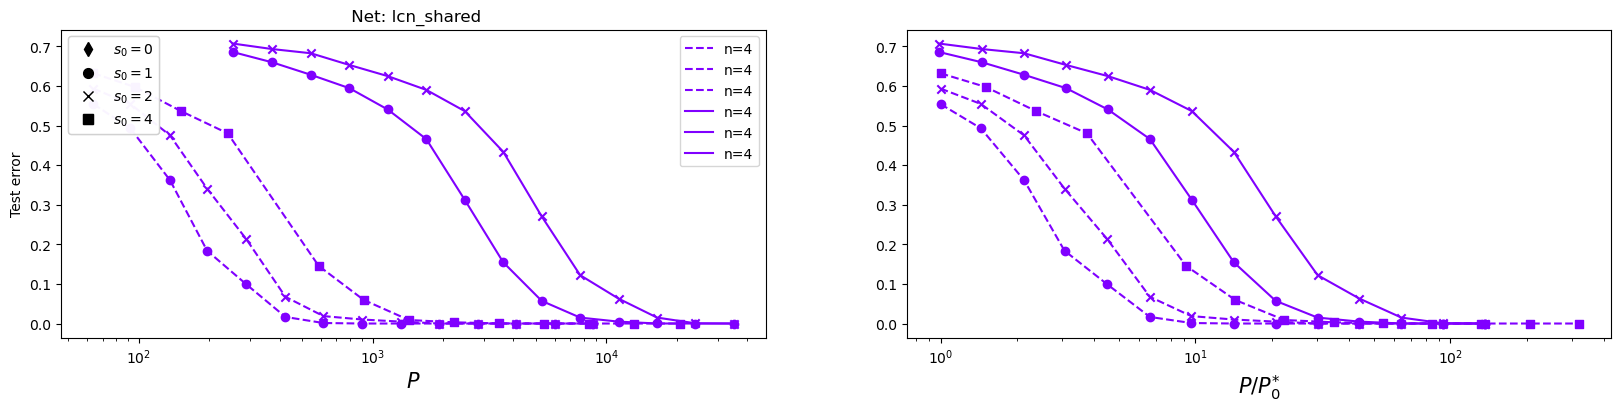

In [10]:
ns  = [4]
sss= [2]

print("TEST IF LIKE CNN WITH s0=0 FOR q=2 for n fixed and varying L")
###### L=3 ########
#NO WHITENING
choice = "best"

#lr = .1
width = 512
seed = 0
nets =["lcn_shared"]#i

fig, axs = plt.subplots(1,2, figsize = (20,4))
s0s = [1,2,4] #,2,4,6
Ls=[2,3]
colors = cm.rainbow(np.linspace(0, 1, max(Ls)+1))

for (idxL,L) in enumerate(Ls):
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==1: lss = ':'
    for (idxn,n) in enumerate(ns):
        col = colors[idxn]
        for (idxq,q) in enumerate([L]):
        
            for (idx_s0,s0) in enumerate(s0s):
                print(s0)
        
                
                
                for (idxs,s) in enumerate(sss):
        
                    if s==4 and s0>0:
                        break
                    
                    
                    m = n**(s-1)
                    for (idxnet,net) in enumerate(nets):
                        axs[0].set_title(" Net: "+net)
                        #print(n)
                        lr = choice_lr(net,s,s0,L)
        
                        accs_cnn = []
                        
                        xx = training_point(net,s,s0,L,n,m)
                        xx = training_point_new(xx,net,n,m,L,q,s0,s,width,lr)
                        
                        for ptrx in xx:
        
                            #print(ptrx,pmax)
                            ptr = int(ptrx) 
                            
                            
                            tmp_seed = 0
        
                            num_seeds = 0
                            for (idx_seed,seed) in enumerate(np.array([1])):
        
        
                            #print(ptr)
                                try:
                                    tmp = load_net(net,ptr,n,m,L,q,s0,s,seed,width,lr)
                                    tmp_seed += (100-tmp[choice]["acc"])/100
                                    num_seeds +=1
                                except:
                                    #print("lcn_s_L2/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        
                                    pass
                            if num_seeds>0:
                                accs_cnn.append(tmp_seed/num_seeds)
                        
                        axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col,label ="n=%d"%n)  
                        
                        if s0==1:
                            mar = "o"
                        elif s0==2:
                            mar = "x"
                        elif s0==4:
                            mar = "s"
                        elif s0==6:
                            mar = "v"
                        elif s0==0:
                            mar = "d"
                        axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
        
                        #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                        #plt.axvline(x=n**4,color="red")
                        #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                        axs[0].set_xlabel(r"$P$",size = 15)
                        axs[0].set_ylabel("Test error")
                        axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03],loc = 'upper left')   
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L
'''
s01 = mlines.Line2D([], [], color='black', marker=None, linestyle='--',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s03 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=1$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s03,s01,s02],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n
'''
'''
list = []
for (idxs,s) in enumerate(sss):
    nlist.append(mlines.Line2D([], [], color=colors[idxs], marker=None, linestyle='-',
              markersize=7, label=r'$s=%d$'%(s)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
axs[0].legend(handles=nlist,loc = 'lower left')  
'''
  
###############################################################



###### L=3 ########
#NO WHITENING

nets =["lcn_shared"]#


for (idxL,L) in enumerate(Ls):
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==1: lss = ':'
    for (idxn,n) in enumerate(ns):
        
        for (idxq,q) in enumerate([L]):
            col = colors[idxq]
            for (idx_s0,s0) in enumerate(s0s):
                print(s0)
        
                
                for (idxs,s) in enumerate(sss):
    
                    m = n**(s-1)
                    for (idxnet,net) in enumerate(nets):
                        axs[0].set_title(" Net: "+net)
                        #print(n)
                        lr = choice_lr(net,s,s0,L)
        
                        accs_cnn = []
                        
                        #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
        
        
                        xx = training_point(net,s,s0,L,n,m)
                        xx = training_point_new(xx,net,n,m,L,q,s0,s,width,lr)
    
                        for ptrx in xx:
        
                            #print(ptrx,pmax)
                            ptr = int(ptrx) 
                            
                            
                            tmp_seed = 0
        
                            num_seeds = 0
                            for (idx_seed,seed) in enumerate(np.array([1])):
        
        
                            #print(ptr)
                                try:
                                    tmp = load_net(net,ptr,n,m,L,q,s0,s,seed,width,lr)
                                    tmp_seed += (100-tmp[choice]["acc"])/100
                                    num_seeds +=1
                                except:
                                    #print("lcn_s_L2/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
        
                                    pass
                            if num_seeds>0:
                                accs_cnn.append(tmp_seed/num_seeds)
                         
                        if idxnet==0:
        
                            fac_m = n*m**(L)
                            xx = xx/(fac_m)
        
                            axs[idxnet+1].set_xlabel(r"$P/P^{*}_{0}$",size = 15)
                        elif idxnet==1:
                            fac_m = n*m**(L)
                            xx = xx/(fac_m*(s0+1)**(L))
        
                            axs[idxnet+1].set_xlabel(r"$P/(s_0+1)^L$",size = 15)
                        elif idxnet==2:
                            fac_m = n*m**(L)
                            
                            xx = xx/(fac_m*(s0+1)**(L-1+s))
        
                            axs[idxnet+1].set_xlabel(r"$P/[(s_0+1)^{L-1}(s_0+1)^s]$",size = 15)
        
                        axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                        
                        if s0==1:
                            mar = "o"
                        elif s0==2:
                            mar = "x"
                        elif s0==4:
                            mar = "s"
                        elif s0==6:
                            mar = "v"
                        elif s0==0:
                            mar = "d"
                        axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
        
                        #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                        #plt.axvline(x=n**4,color="red")
                        #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                        
                        axs[idxnet+1].set_xscale("log")
                    
        
#plt.savefig("diffeo_lcn_L2_A.pdf")
#plt.savefig("diffeo_lcn_L2_A.png", bbox_inches='tight')

In [ ]:
#NOT REALLY WORKING

TEST IF LIKE LCN FOR q=0 
1
2
4
1
2
4


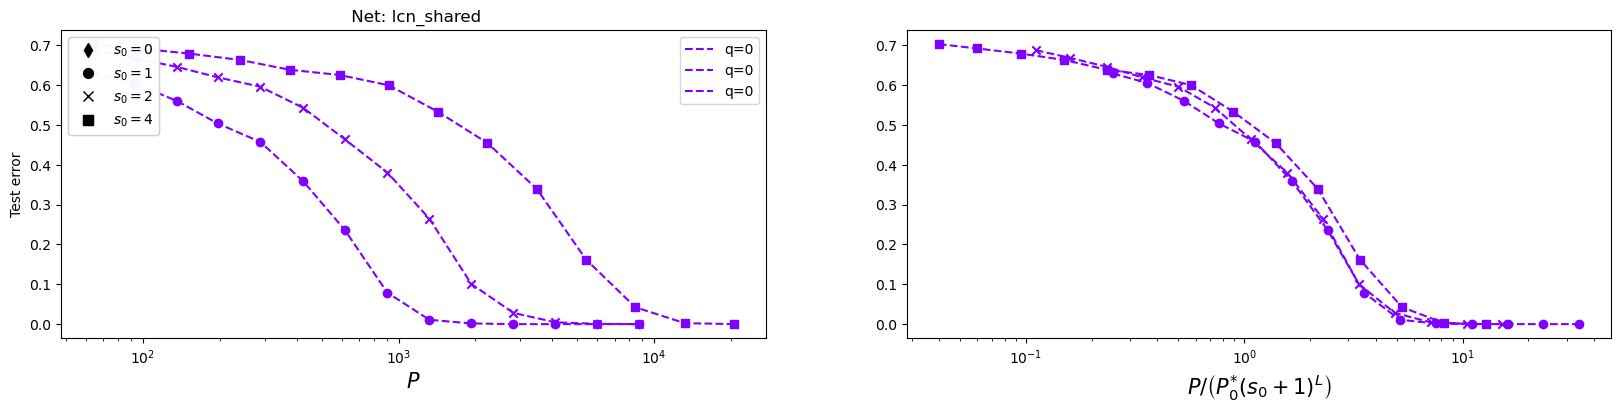

In [25]:
n = 4
sss= [2]

print("TEST IF LIKE LCN FOR q=0 ")
###### L=3 ########
#NO WHITENING
choice = "best"

#lr = .1
width = 512
seed = 0
nets =["lcn_shared"]#i

fig, axs = plt.subplots(1,2, figsize = (20,4))
s0s = [1,2,4] #,2,4,6
Ls=[2]

for (idxL,L) in enumerate(Ls):
    colors = cm.rainbow(np.linspace(0, 1, L+1))
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==1: lss = ':'
        
    for (idxq,q) in enumerate(range(L+1)):
        if q>0: break
        col = colors[idxq]
        
        
    
        for (idx_s0,s0) in enumerate(s0s):
            print(s0)
    
            
            
            for (idxs,s) in enumerate(sss):
    
                if s==4 and s0>0:
                    break
                
                
                m = n**(s-1)
                for (idxnet,net) in enumerate(nets):
                    axs[0].set_title(" Net: "+net)
                    #print(n)
                    lr = choice_lr(net,s,s0,L)
    
                    accs_cnn = []
                    
                    xx = training_point(net,s,s0,L,n,m)
                    xx = training_point_new(xx,net,n,m,L,q,s0,s,width,lr)
                    
                    for ptrx in xx:
    
                        #print(ptrx,pmax)
                        ptr = int(ptrx) 
                        
                        
                        tmp_seed = 0
    
                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):
    
    
                        #print(ptr)
                            try:
                                tmp = load_net(net,ptr,n,m,L,q,s0,s,seed,width,lr)
                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                #print("lcn_s_L2/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    
                                pass
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                    
                    axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col,label ="q=%d"%q)  
                    
                    if s0==1:
                        mar = "o"
                    elif s0==2:
                        mar = "x"
                    elif s0==4:
                        mar = "s"
                    elif s0==6:
                        mar = "v"
                    elif s0==0:
                        mar = "d"
                    axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
    
                    #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                    #plt.axvline(x=n**4,color="red")
                    #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                    axs[0].set_xlabel(r"$P$",size = 15)
                    axs[0].set_ylabel("Test error")
                    axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03],loc = 'upper left')   
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L
'''
s01 = mlines.Line2D([], [], color='black', marker=None, linestyle='--',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s03 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=1$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s03,s01,s02],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n
'''
'''
list = []
for (idxs,s) in enumerate(sss):
    nlist.append(mlines.Line2D([], [], color=colors[idxs], marker=None, linestyle='-',
              markersize=7, label=r'$s=%d$'%(s)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
axs[0].legend(handles=nlist,loc = 'lower left')  
'''
  
###############################################################



###### L=3 ########
#NO WHITENING

nets =["lcn_shared"]#


for (idxL,L) in enumerate(Ls):
    colors = cm.rainbow(np.linspace(0, 1, L+1))
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==1: lss = ':'
        
    for (idxq,q) in enumerate(range(L+1)):
        if q>0: break
        col = colors[idxq]
        for (idx_s0,s0) in enumerate(s0s):
            print(s0)
    
            
            for (idxs,s) in enumerate(sss):

                m = n**(s-1)
                for (idxnet,net) in enumerate(nets):
                    axs[0].set_title(" Net: "+net)
                    #print(n)
                    lr = choice_lr(net,s,s0,L)
    
                    accs_cnn = []
                    
                    #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
    
    
                    xx = training_point(net,s,s0,L,n,m)
                    xx = training_point_new(xx,net,n,m,L,q,s0,s,width,lr)

                    for ptrx in xx:
    
                        #print(ptrx,pmax)
                        ptr = int(ptrx) 
                        
                        
                        tmp_seed = 0
    
                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):
    
    
                        #print(ptr)
                            try:
                                tmp = load_net(net,ptr,n,m,L,q,s0,s,seed,width,lr)
                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                #print("lcn_s_L2/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    
                                pass
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                     
                    if idxnet==0:
    
                        fac_m = n*m**(L)
                        xx = xx/(fac_m*(s0+1)**(L))
    
                        axs[idxnet+1].set_xlabel(r"$P/\left(P^{*}_{0}(s_0+1)^{L}\right)$",size = 15)
                    elif idxnet==1:
                        fac_m = n*m**(L)
                        xx = xx/(fac_m*(s0+1)**(L))
    
                        axs[idxnet+1].set_xlabel(r"$P/(s_0+1)^L$",size = 15)
                    elif idxnet==2:
                        fac_m = n*m**(L)
                        
                        xx = xx/(fac_m*(s0+1)**(L-1+s))
    
                        axs[idxnet+1].set_xlabel(r"$P/[(s_0+1)^{L-1}(s_0+1)^s]$",size = 15)
    
                    axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                    
                    if s0==1:
                        mar = "o"
                    elif s0==2:
                        mar = "x"
                    elif s0==4:
                        mar = "s"
                    elif s0==6:
                        mar = "v"
                    elif s0==0:
                        mar = "d"
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
    
                    #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                    #plt.axvline(x=n**4,color="red")
                    #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                    
                    axs[idxnet+1].set_xscale("log")
                
        
#plt.savefig("diffeo_lcn_L2_A.pdf")
#plt.savefig("diffeo_lcn_L2_A.png", bbox_inches='tight')

1
2
4
1
2
4
1
2
4
1
2
4
1
2
4
1
2
4
1
2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


4
1
2
4
1
2
4
1
2
4
1
2
4
1
2
4
1
2
4
1
2
4


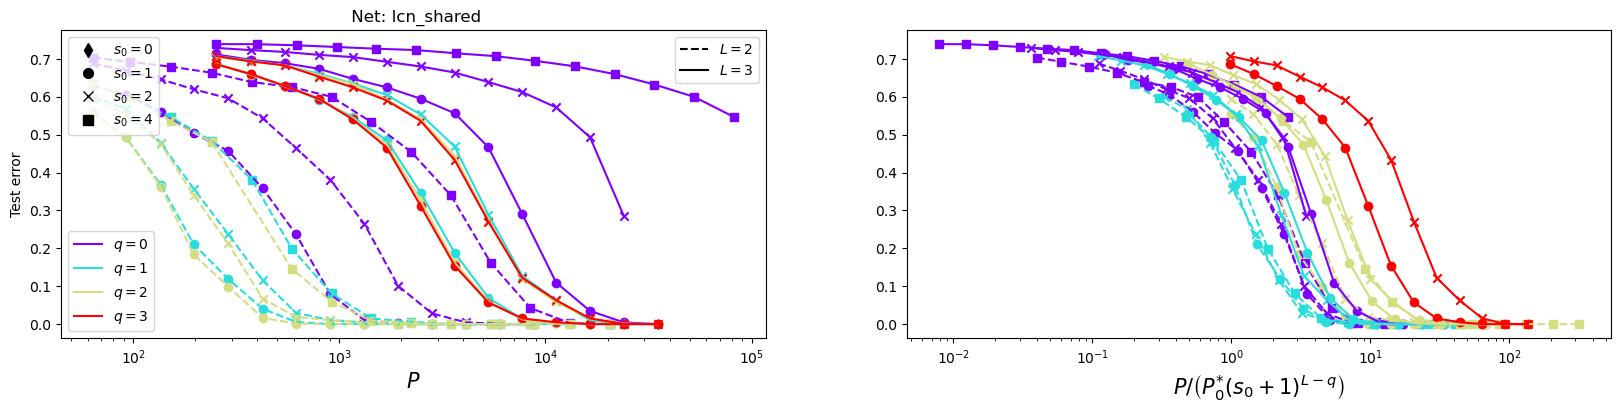

In [4]:
n = 4
sss= [2]


###### L=3 ########
#NO WHITENING
choice = "best"

#lr = .1
width = 512
seed = 0
nets =["lcn_shared"]#i



fig, axs = plt.subplots(1,2, figsize = (20,4))
s0s = [1,2,4] #,2,4,6
Ls=[2,3]
colors = cm.rainbow(np.linspace(0, 1, max(Ls)+1))

for (idxL,L) in enumerate(Ls):
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==1: lss = ':'
        
    for (idxq,q) in enumerate(range(L+1)):
        col = colors[idxq]
    
        for (idx_s0,s0) in enumerate(s0s):
            print(s0)
    
            
            
            for (idxs,s) in enumerate(sss):
    
                #if s==4 and s0>0:
                #    break
                
                
                m = n**(s-1)
                for (idxnet,net) in enumerate(nets):
                    axs[0].set_title(" Net: "+net)
                    #print(n)
                    lr = choice_lr(net,s,s0,L)
    
                    accs_cnn = []
                    
                    xx = training_point(net,s,s0,L,n,m)
                    xx = training_point_new(xx,net,n,m,L,q,s0,s,width,lr)
                    
                    for ptrx in xx:
    
                        #print(ptrx,pmax)
                        ptr = int(ptrx) 
                        
                        
                        tmp_seed = 0
    
                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):
    
    
                        #print(ptr)
                            try:
                                tmp = load_net(net,ptr,n,m,L,q,s0,s,seed,width,lr)
                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                #print("lcn_s_L2/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    
                                pass
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                    
                    axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                    
                    if s0==1:
                        mar = "o"
                    elif s0==2:
                        mar = "x"
                    elif s0==4:
                        mar = "s"
                    elif s0==6:
                        mar = "v"
                    elif s0==0:
                        mar = "d"
                    axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
    
                    #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                    #plt.axvline(x=n**4,color="red")
                    #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                    axs[0].set_xlabel(r"$P$",size = 15)
                    axs[0].set_ylabel("Test error")
                    axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03],loc = 'upper left')   
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L

s01 = mlines.Line2D([], [], color='black', marker=None, linestyle='--',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s03 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=1$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s01,s02],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n

list = []
for (idxq,q) in enumerate(range(max(Ls)+1)):
    list.append(mlines.Line2D([], [], color=colors[idxq], marker=None, linestyle='-',
              markersize=7, label=r'$q=%d$'%(q)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
axs[0].legend(handles=list,loc = 'lower left')  

  
###############################################################



###### L=3 ########
#NO WHITENING

nets =["lcn_shared"]#


for (idxL,L) in enumerate(Ls):
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==1: lss = ':'
        
    for (idxq,q) in enumerate(range(L+1)):
        col = colors[idxq]
        for (idx_s0,s0) in enumerate(s0s):
            print(s0)
    
            
            for (idxs,s) in enumerate(sss):

                m = n**(s-1)
                for (idxnet,net) in enumerate(nets):
                    axs[0].set_title(" Net: "+net)
                    #print(n)
                    lr = choice_lr(net,s,s0,L)
    
                    accs_cnn = []
                    
                    #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
    
    
                    xx = training_point(net,s,s0,L,n,m)
                    xx = training_point_new(xx,net,n,m,L,q,s0,s,width,lr)

                    for ptrx in xx:
    
                        #print(ptrx,pmax)
                        ptr = int(ptrx) 
                        
                        
                        tmp_seed = 0
    
                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):
    
    
                        #print(ptr)
                            try:
                                tmp = load_net(net,ptr,n,m,L,q,s0,s,seed,width,lr)
                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                #print("lcn_s_L2/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_n_"+str(n)+"_L_"+str(L)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    
                                pass
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                     
                    if idxnet==0:
    
                        fac_m = n*m**(L)
                        xx = xx/(fac_m*(s0+1)**(L-q))
    
                        axs[idxnet+1].set_xlabel(r"$P/\left(P^{*}_{0}(s_0+1)^{L-q}\right)$",size = 15)
                    elif idxnet==1:
                        fac_m = n*m**(L)
                        xx = xx/(fac_m*(s0+1)**(L))
    
                        axs[idxnet+1].set_xlabel(r"$P/(s_0+1)^L$",size = 15)
                    elif idxnet==2:
                        fac_m = n*m**(L)
                        
                        xx = xx/(fac_m*(s0+1)**(L-1+s))
    
                        axs[idxnet+1].set_xlabel(r"$P/[(s_0+1)^{L-1}(s_0+1)^s]$",size = 15)
    
                    axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                    
                    if s0==1:
                        mar = "o"
                    elif s0==2:
                        mar = "x"
                    elif s0==4:
                        mar = "s"
                    elif s0==6:
                        mar = "v"
                    elif s0==0:
                        mar = "d"
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
    
                    #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                    #plt.axvline(x=n**4,color="red")
                    #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                    
                    axs[idxnet+1].set_xscale("log")
                
        
#plt.savefig("diffeo_lcn_L2_A.pdf")
#plt.savefig("diffeo_lcn_L2_A.png", bbox_inches='tight')

In [ ]:
#missing L=3, s0=4,q>0

q
0
4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


q
1
4
q
2
4
q
3
4
4
4
4
4


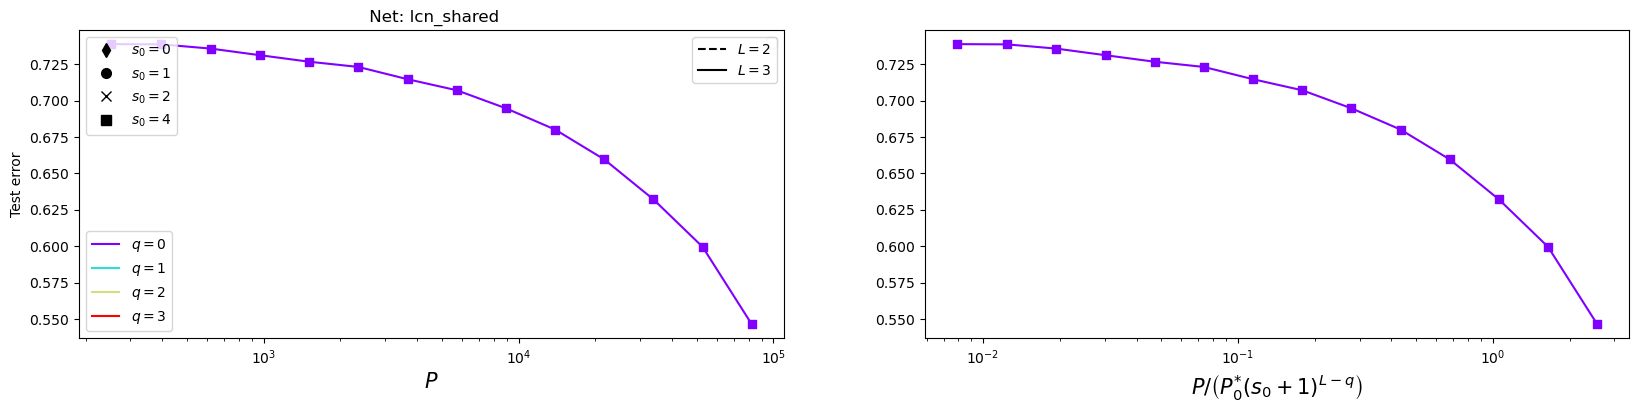

In [4]:
n = 4
sss= [2]


###### L=3 ########
#NO WHITENING
choice = "best"

#lr = .1
width = 512
seed = 0
nets =["lcn_shared"]#i



fig, axs = plt.subplots(1,2, figsize = (20,4))
s0s = [4] #,2,4,6
Ls=[3]
colors = cm.rainbow(np.linspace(0, 1, max(Ls)+1))

for (idxL,L) in enumerate(Ls):
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==1: lss = ':'
        
    for (idxq,q) in enumerate(range(L+1)):
        col = colors[idxq]
        print('q')
        print(q)
    
        for (idx_s0,s0) in enumerate(s0s):
            print(s0)
    
            
            
            for (idxs,s) in enumerate(sss):
    

                
                
                m = n**(s-1)
                for (idxnet,net) in enumerate(nets):
                    axs[0].set_title(" Net: "+net)
                    #print(n)
                    lr = choice_lr(net,s,s0,L)
    
                    accs_cnn = []
                    
                    xx = training_point(net,s,s0,L,n,m)
                    xx = training_point_new(xx,net,n,m,L,q,s0,s,width,lr)
                    
                    for ptrx in xx:
    
                        #print(ptrx,pmax)
                        ptr = int(ptrx) 
                        
                        
                        tmp_seed = 0
    
                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):
    
    
                        #print(ptr)
                            try:
                                tmp = load_net(net,ptr,n,m,L,q,s0,s,seed,width,lr)
                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                print("lcn_shared/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_q_"+str(q)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    
                                pass
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                    
                    axs[0].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                    
                    if s0==1:
                        mar = "o"
                    elif s0==2:
                        mar = "x"
                    elif s0==4:
                        mar = "s"
                    elif s0==6:
                        mar = "v"
                    elif s0==0:
                        mar = "d"
                    axs[0].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
    
                    #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                    #plt.axvline(x=n**4,color="red")
                    #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                    axs[0].set_xlabel(r"$P$",size = 15)
                    axs[0].set_ylabel("Test error")
                    axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#legend symbols s0
s01 = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
              markersize=7, label=r'$s_0=1$')
s02 = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
              markersize=7, label=r'$s_0=2$')
s03 = mlines.Line2D([], [], color='black', marker='s', linestyle='None',
              markersize=7, label=r'$s_0=4$')
s04 = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
              markersize=7, label=r'$s_0=6$')
s00 = mlines.Line2D([], [], color='black', marker='d', linestyle='None',
              markersize=7, label=r'$s_0=0$')
first_legend = axs[0].legend()
ax = axs[0].add_artist(first_legend)
legend1 = axs[0].legend(handles=[s00,s01,s02,s03],loc = 'upper left')   
axs[0].add_artist(legend1)

#legend linestyles -- vs - for L

s01 = mlines.Line2D([], [], color='black', marker=None, linestyle='--',
              markersize=7, label=r'$L=2$')
s02 = mlines.Line2D([], [], color='black', marker=None, linestyle='-',
              markersize=7, label=r'$L=3$')
s03 = mlines.Line2D([], [], color='black', marker=None, linestyle=':',
              markersize=7, label=r'$L=1$')
#second_legend = axs[0].legend()
#ax = axs[0].add_artist(second_legend)
legend2 = axs[0].legend(handles=[s01,s02],loc = 'upper right')   
axs[0].add_artist(legend2)
#legend colors n

list = []
for (idxq,q) in enumerate(range(max(Ls)+1)):
    list.append(mlines.Line2D([], [], color=colors[idxq], marker=None, linestyle='-',
              markersize=7, label=r'$q=%d$'%(q)))
#third_legend = axs[0].legend()
#ax = axs[0].add_artist(third_legend)
axs[0].legend(handles=list,loc = 'lower left')  

  
###############################################################



###### L=3 ########
#NO WHITENING

nets =["lcn_shared"]#


for (idxL,L) in enumerate(Ls):
    
    if L==2: lss = '--'
    elif L==3: lss = '-'
    elif L==1: lss = ':'
        
    for (idxq,q) in enumerate(range(L+1)):
        col = colors[idxq]
        for (idx_s0,s0) in enumerate(s0s):
            print(s0)
    
            
            for (idxs,s) in enumerate(sss):

                m = n**(s-1)
                for (idxnet,net) in enumerate(nets):
                    axs[0].set_title(" Net: "+net)
                    #print(n)
                    lr = choice_lr(net,s,s0,L)
    
                    accs_cnn = []
                    
                    #pmax = ((2*s0+2)**(2**L -1))*n**(2**L)
    
    
                    xx = training_point(net,s,s0,L,n,m)
                    xx = training_point_new(xx,net,n,m,L,q,s0,s,width,lr)

                    for ptrx in xx:
    
                        #print(ptrx,pmax)
                        ptr = int(ptrx) 
                        
                        
                        tmp_seed = 0
    
                        num_seeds = 0
                        for (idx_seed,seed) in enumerate(np.array([1])):
    
    
                        #print(ptr)
                            try:
                                tmp = load_net(net,ptr,n,m,L,q,s0,s,seed,width,lr)
                                tmp_seed += (100-tmp[choice]["acc"])/100
                                num_seeds +=1
                            except:
                                print("lcn_shared/hier1_w_0_"+net+"_diffeo_ptr_"+str(ptr)+"_n_"+str(n)+"_m_"+str(m)+"_L_"+str(L)+"_q_"+str(q)+"_s0_"+str(s0)+"_s_"+str(s)+"_seed_"+str(seed)+"_width_"+str(width)+"_lr_"+str(lr)+".npy")
    
                                pass
                        if num_seeds>0:
                            accs_cnn.append(tmp_seed/num_seeds)
                     
                    if idxnet==0:
    
                        fac_m = n*m**(L)
                        xx = xx/(fac_m*(s0+1)**(L-q))
    
                        axs[idxnet+1].set_xlabel(r"$P/\left(P^{*}_{0}(s_0+1)^{L-q}\right)$",size = 15)
                    elif idxnet==1:
                        fac_m = n*m**(L)
                        xx = xx/(fac_m*(s0+1)**(L))
    
                        axs[idxnet+1].set_xlabel(r"$P/(s_0+1)^L$",size = 15)
                    elif idxnet==2:
                        fac_m = n*m**(L)
                        
                        xx = xx/(fac_m*(s0+1)**(L-1+s))
    
                        axs[idxnet+1].set_xlabel(r"$P/[(s_0+1)^{L-1}(s_0+1)^s]$",size = 15)
    
                    axs[idxnet+1].plot(xx[:len(accs_cnn)]*n,accs_cnn,ls=lss,color = col)  
                    
                    if s0==1:
                        mar = "o"
                    elif s0==2:
                        mar = "x"
                    elif s0==4:
                        mar = "s"
                    elif s0==6:
                        mar = "v"
                    elif s0==0:
                        mar = "d"
                    axs[idxnet+1].scatter(xx[:len(accs_cnn)]*n,accs_cnn,marker = mar,color = col) 
    
                    #plt.plot(xx[:len(accs_fcn_L)],accs_fcn_L,label="FCN",ls="-") 
                    #plt.axvline(x=n**4,color="red")
                    #plt.plot(red_xx,np.ones(len(red_xx))*(1/n)*100,label="chance 1/n",ls="--",color="black")  
                    
                    axs[idxnet+1].set_xscale("log")
                
        
#plt.savefig("diffeo_lcn_L2_A.pdf")
#plt.savefig("diffeo_lcn_L2_A.png", bbox_inches='tight')